#                    Best Doctor

## Patient Information 

In [384]:
import pandas as pd
patient_review = pd.read_excel('Patient_Review.xlsx')
print(patient_review.columns)
patient_review

Index(['Name', 'Ethical_Behaviour', 'Review'], dtype='object')


,Name,Ethical_Behaviour,Review
0,Dr. Aadharsh Sharma,5,Nice Treatment
1,Dr. Aadharsh Sharma,4,Very Profesional
2,Dr. Aadharsh Sharma,4,Good Experience
3,Dr. Aadharsh Sharma,4,Very nice
4,Dr. Abhishek Singhal,3,ok..
...,...,...,...
253,Dr. Yamini,3,Good Experience
254,Dr. Yaswanth,5,Good Treatment
255,Dr. Yaswanth,4,"was a kind, competent, and excellent diagnosti..."
256,Dr. Yaswanth,5,Good Treatment


# Sentiment Analysis on Patient Review 

In [385]:
from textblob import TextBlob

In [386]:
name,sentiment,eth=list(),list(),list()
for group, frame in patient_review.groupby('Name'):
    x=list()
    for i in frame['Review']:
        blob = TextBlob(i)
    l,m=0,0
    for sentence in blob.sentences:
        l+=sentence.sentiment.polarity 
    for i in frame['Ethical_Behaviour']: 
        m+=int(i)
    name.append(group)
    sentiment.append(l)
    eth.append(m/len(frame))
df = pd.DataFrame({})
df['Name'],df['Sentiment'],df['Ethical_Behaviour']=pd.Series(name),pd.Series(sentiment),pd.Series(eth)
df

,Name,Sentiment,Ethical_Behaviour
0,Dr. Aadharsh Sharma,0.780000,4.25
1,Dr. Abhishek Singhal,0.400000,3.50
2,Dr. Abijith,1.000000,4.00
3,Dr. Abir Rajvansh,1.000000,4.50
4,Dr. Addline,1.000000,4.50
...,...,...,...
100,Dr. Vikram Shah,0.400000,4.50
101,Dr. Vivan,0.600000,4.00
102,Dr. Vividha Chakraborthy,0.700000,3.00
103,Dr. Yamini,0.700000,3.50


In [387]:
rank_list = pd.DataFrame({})
rank_list['Name']=df['Name']
rank_list['Patient_Review']=df['Sentiment']*0.6+df['Ethical_Behaviour']*0.4
rank_list
rank_list1=rank_list.copy()

# Top 20 Doctors Based on Patient Information

In [388]:
rank_list1.sort_values(by=['Patient_Review'],inplace=True,ascending=False)
rank_list1.index = np.arange(1, len(df) + 1)
rank_list1[:20]

,Name,Patient_Review
1,Dr. Anasuya,3.0680
2,Dr. Pearl Ruby,2.6000
3,Dr. Indraja,2.5000
4,Dr. M Jayanthi,2.4200
5,Dr. Abir Rajvansh,2.4000
6,Dr. Addline,2.4000
7,Dr. Barka,2.4000
8,Dr. Ajay Singania,2.4000
9,Dr. Nisha Joseph,2.4000
10,Dr. Arnav singh,2.4000


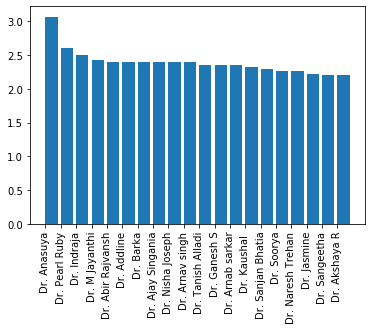

In [389]:
import matplotlib.pyplot as plt
plt.bar(rank_list1['Name'][:20],rank_list1['Patient_Review'][:20],align='edge')
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
plt.show()

# Basic Factors- Doctor Information

In [394]:
doctor_factors = pd.read_excel('Doctor_Info.xlsx')
doctor_factors

,Name,Year_exp,Patient_visits,Availability,Department,Special_Achievements,Awards_National,Awards_International,Success_rate,Failures
0,Dr. Aadharsh Sharma,20,32,6,Cardiologist,2,0,0,85,10
1,Dr. Abhishek Singhal,6,13,8,Gynacologist,0,0,0,54,4
2,Dr. Abijith,9,7,9,Allergist/Immunologist,0,1,0,98,34
3,Dr. Abir Rajvansh,6,45,5,Anesthesiologist,0,0,0,60,5
4,Dr. Addline,12,34,10,Cardiologist,1,0,0,99,56
...,...,...,...,...,...,...,...,...,...,...
100,Dr. Vikram Shah,9,24,4,Cardiologist,3,0,2,65,7
101,Dr. Vivan,10,6,8,Rheumatologist,0,1,0,67,14
102,Dr. Vividha Chakraborthy,7,68,4,Gynacologist,0,0,0,64,5
103,Dr. Yamini,8,84,4,Surgeon,3,0,0,34,30


In [395]:
rank_list.index = np.arange(0, len(df))
rank_list['Doctor_info']=doctor_factors['Year_exp']*0.50+doctor_factors['Availability']*0.50
rank_list['Doctor_info']=(rank_list['Doctor_info']*10)/max(rank_list['Doctor_info'])

# Top 20 Doctors Based On Doctor Info

In [396]:
import numpy as np
rank_list2=rank_list.copy()
rank_list2.sort_values(by=['Doctor_info'],inplace=True,ascending=False)
rank_list2.index = np.arange(1, len(df) + 1)
rank_list2[:20]

,Name,Patient_Review,Doctor_info
1,Dr. Saketh,1.960,10.000000
2,Dr. Jasmine,2.220,9.655172
3,Dr. Naresh Trehan,2.260,9.310345
4,Dr. Reshmi,1.820,9.310345
5,Dr. Kunal Singh,1.400,9.310345
6,Dr. Ananya R,1.840,8.965517
7,Dr. Aadharsh Sharma,2.168,8.965517
8,Dr. Daisy,2.160,8.620690
9,Dr. Sirisha,1.690,8.620690
10,Dr. Ashok rajagopal,1.820,8.275862


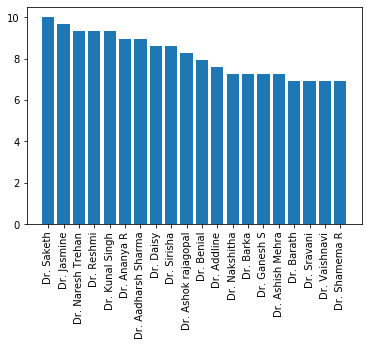

In [397]:
plt.bar(rank_list2['Name'][:20], rank_list2['Doctor_info'][:20])
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90) 
plt.show()

# Treatment History

In [398]:
rank_list3=pd.DataFrame({})
rank_list3['Name']=doctor_factors['Name']
rank_list3['T_history']=(doctor_factors['Special_Achievements']*0.25)+(doctor_factors['Awards_National']*0.125)+(doctor_factors['Awards_International']*0.125 - (doctor_factors['Failures']*0.25) + (doctor_factors['Success_rate']*0.25) + (doctor_factors['Patient_visits'])*0.25)
rank_list3.sort_values(by=['T_history'],inplace=True,ascending=False)
rank_list3[:20]

,Name,T_history
31,Dr. Ganesh S,42.50
84,Dr. Sirisha,41.75
89,Dr. Sravani,40.50
98,Dr. Vaishnavi,35.50
74,Dr. Santosh R,34.75
80,Dr. Shanjietha A,34.25
96,Dr. Tanish Alladi,33.50
40,Dr. Joseph,32.25
41,Dr. Kabeer Mohamed,32.25
102,Dr. Vividha Chakraborthy,31.75


In [399]:
rank_list3.sort_values(by=['Name'],inplace=True)
rank_list.sort_values(by=['Name'],inplace=True)
rank_list['T_history']=rank_list3['T_history']

# Top 20 Doctors            (All factors Considered)

In [400]:
rank_list['Performance']=rank_list['Patient_Review']*0.25+rank_list['Doctor_info']*0.25+rank_list['T_history']*0.50
rank_list.sort_values(by=['Name'],inplace=True)
rank_list['Department']=doctor_factors['Department']
rank_list.sort_values(by=['Performance'],inplace=True,ascending=False)
rank_list.index = np.arange(1, len(df) + 1)
rank_list[:20]

,Name,Patient_Review,Doctor_info,T_history,Performance,Department
1,Dr. Ganesh S,2.3600,7.241379,42.50,23.650345,Allergist/Immunologist
2,Dr. Sirisha,1.6900,8.620690,41.75,23.452672,Pediatrician
3,Dr. Sravani,1.7200,6.896552,40.50,22.404138,Endocrinologist
4,Dr. Vaishnavi,2.2000,6.896552,35.50,20.024138,Rheumatologist
5,Dr. Shanjietha A,1.8900,5.517241,34.25,18.976810,Psychiatrist
6,Dr. Santosh R,2.0200,3.793103,34.75,18.828276,Surgeon
7,Dr. Tanish Alladi,2.3600,3.793103,33.50,18.288276,Pulmonologist
8,Dr. Reshmi,1.8200,9.310345,30.75,18.157586,Rheumatologist
9,Dr. Joseph,1.8625,3.448276,32.25,17.452694,Ophthalmologist
10,Dr. Yaswanth,2.0000,6.206897,30.75,17.426724,Dermatologist


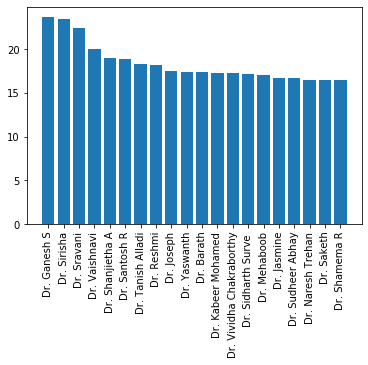

In [401]:
plt.bar(rank_list['Name'][:20], rank_list['Performance'][:20])
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90) 
plt.show()

# Best Department Analysis

In [402]:
g,av=list(),list()
for group, frame in rank_list.groupby('Department'):
    avg=np.average(frame['Performance'])
    g.append(group)
    av.append(avg) 

dept_contribution = pd.DataFrame({})
dept_contribution['Department'],dept_contribution['Performance']=pd.Series(g),pd.Series(av)
dept_contribution.sort_values(by=['Performance'],inplace=True,ascending=False)
dept_contribution.index = np.arange(1, len(dept_contribution) + 1)
dept_contribution

,Department,Performance
1,Pulmonologist,14.988780
2,Allergist/Immunologist,14.159352
3,Nephrologist,13.768724
4,Cardiologist,13.576848
5,Gynacologist,13.525938
6,Rheumatologist,13.400224
7,Pediatrician,12.846034
8,Psychiatrist,12.837397
9,Endocrinologist,12.173538
10,Podiatrist,11.909072


## Graph

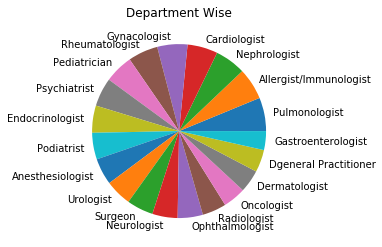

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

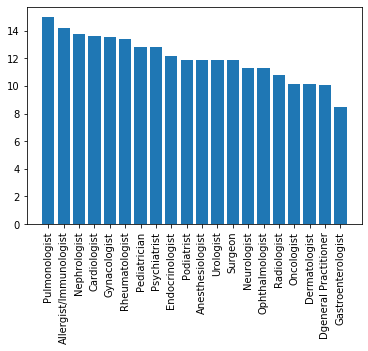

In [403]:
plt.pie(dept_contribution['Performance'], labels=dept_contribution['Department'])
plt.title('Department Wise')
plt.show()
plt.bar(dept_contribution['Department'], dept_contribution['Performance'])
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90) 
plt.title